## Assignments-Naive Bayes

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

C:\Users\PRASAD\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
train = pd.read_csv('SalaryData_Train.csv')

In [3]:
test = pd.read_csv('SalaryData_Test.csv')

In [4]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,57,Federal-gov,HS-grad,9,Separated,Adm-clerical,Other-relative,Black,Female,0.0,0.0,35.0,United-States,<=50K
16004,55,Private,10th,6,Widowed,Transport-moving,Not-in-family,Black,Female,0.0,0.0,35.0,United-States,<=50K
16005,21,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
16006,36,Self-emp-not-inc,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [5]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            16008 non-null  int64  
 1   workclass      16008 non-null  object 
 2   education      16008 non-null  object 
 3   educationno    16008 non-null  int64  
 4   maritalstatus  16008 non-null  object 
 5   occupation     16008 non-null  object 
 6   relationship   16007 non-null  object 
 7   race           16007 non-null  object 
 8   sex            16007 non-null  object 
 9   capitalgain    16007 non-null  float64
 10  capitalloss    16007 non-null  float64
 11  hoursperweek   16007 non-null  float64
 12  native         16007 non-null  object 
 13  Salary         16007 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.7+ MB


In [7]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,16008.000000,16008.000000,16007.000000,16007.000000,16007.000000
mean,38.435970,10.133246,1057.912913,88.413632,40.931967
std,13.130512,2.535052,7244.250233,402.786387,11.892714
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
test['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [11]:
train[train.duplicated()].shape

(1126, 14)

In [12]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,23,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15968,59,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15979,32,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
15981,34,Private,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [13]:
Train =train.drop_duplicates()

In [14]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,57,Federal-gov,HS-grad,9,Separated,Adm-clerical,Other-relative,Black,Female,0.0,0.0,35.0,United-States,<=50K
16004,55,Private,10th,6,Widowed,Transport-moving,Not-in-family,Black,Female,0.0,0.0,35.0,United-States,<=50K
16005,21,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
16006,36,Self-emp-not-inc,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [15]:
Train.isnull().sum().sum()
## there is no nan values in the Train Data set

8

In [16]:
test[test.duplicated()].shape

(930, 14)

In [17]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [18]:
Test=test.drop_duplicates()

In [19]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [20]:
Test.isnull().sum().sum()
## there is no nan values in the Train Data set

0

In [52]:
Test.fillna(Test.mean(), inplace=True)

<ipython-input-52-992d9924cefb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Test.fillna(Test.mean(), inplace=True)
<ipython-input-52-992d9924cefb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.fillna(Test.mean(), inplace=True)


In [54]:
Train.fillna(Train.mean(), inplace=True)

<ipython-input-54-aef4477a7b31>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train.fillna(Train.mean(), inplace=True)
<ipython-input-54-aef4477a7b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.fillna(Train.mean(), inplace=True)


In [55]:
Train['Salary'].value_counts()

 <=50K    11134
 >50K      3747
Name: Salary, dtype: int64

In [56]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [57]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
0,1643,252
1,4,0
2,1390,414
3,1030,955
4,432,53
5,571,45
6,813,131
7,1555,73
8,81,0


In [58]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
0,317,185
1,747,310
2,8380,2376
3,253,309
4,940,378
5,492,189
6,5,0


In [59]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
workclass,,,,,,,,,,,,,,,
0,169,4,38,85,3,11,7,23,0,0,85,19,8,37,13
1,155,0,72,101,15,18,4,100,0,0,366,146,5,16,59
2,1386,0,1329,1297,224,574,893,1338,81,1,1098,101,1456,340,639
3,19,0,47,204,21,1,8,13,0,0,83,2,147,2,15
4,31,0,287,201,214,8,23,90,0,0,200,3,193,14,54
5,135,0,30,97,6,3,8,64,0,0,225,59,3,35,16
6,0,0,1,0,2,1,1,0,0,0,0,0,0,0,0


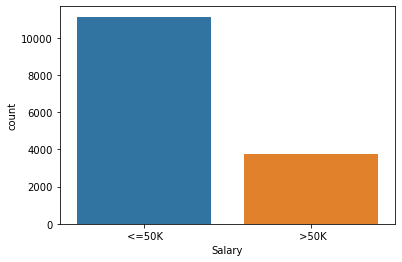

 <=50K    11134
 >50K      3747
Name: Salary, dtype: int64

In [60]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

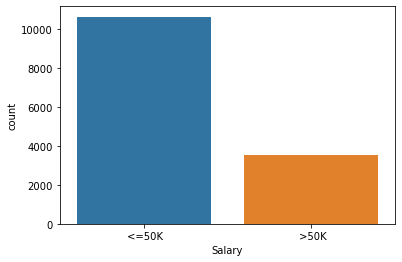

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [61]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

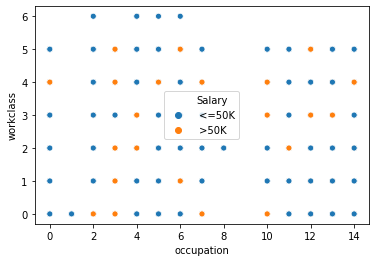

In [62]:
sns.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])

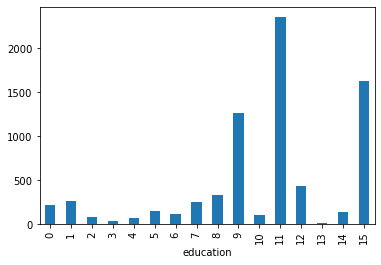

In [63]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

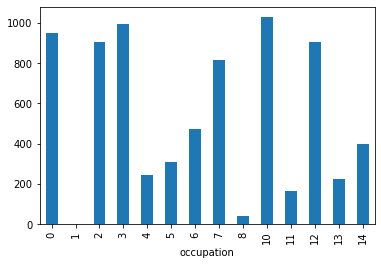

In [64]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

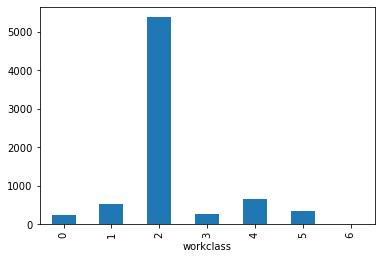

In [65]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

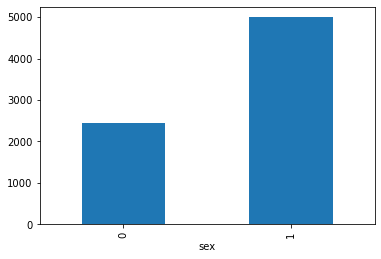

In [66]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

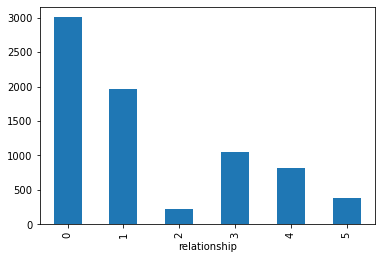

In [67]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [68]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [69]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

<ipython-input-69-b761bae27bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i]= number.fit_transform(Train[i])
<ipython-input-69-b761bae27bef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])
<ipython-input-69-b761bae27bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [70]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.000000,0.00000,40.00000,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.000000,0.00000,13.00000,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.000000,0.00000,40.00000,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.000000,0.00000,40.00000,37,<=50K
4,28,2,9,13,2,10,5,2,0,0.000000,0.00000,40.00000,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,57,0,11,9,5,0,2,2,0,0.000000,0.00000,35.00000,37,<=50K
16004,55,2,0,6,6,14,1,2,0,0.000000,0.00000,35.00000,37,<=50K
16005,21,2,0,6,2,2,0,4,1,0.000000,0.00000,40.00000,37,<=50K
16006,36,4,12,14,2,10,0,4,1,0.000000,0.00000,45.00000,37,>50K


In [71]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [72]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [73]:
len(colnames)

14

In [74]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.000000,0.00000,40.00000,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.000000,0.00000,13.00000,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.000000,0.00000,40.00000,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.000000,0.00000,40.00000,37,<=50K
4,28,2,9,13,2,10,5,2,0,0.000000,0.00000,40.00000,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16003,57,0,11,9,5,0,2,2,0,0.000000,0.00000,35.00000,37,<=50K
16004,55,2,0,6,6,14,1,2,0,0.000000,0.00000,35.00000,37,<=50K
16005,21,2,0,6,2,2,0,4,1,0.000000,0.00000,40.00000,37,<=50K
16006,36,4,12,14,2,10,0,4,1,0.000000,0.00000,45.00000,37,>50K


In [75]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [76]:
Test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [77]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [78]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [79]:
x_train

array([[39.        ,  5.        ,  9.        , ...,  0.        ,
        40.        , 37.        ],
       [50.        ,  4.        ,  9.        , ...,  0.        ,
        13.        , 37.        ],
       [38.        ,  2.        , 11.        , ...,  0.        ,
        40.        , 37.        ],
       ...,
       [21.        ,  2.        ,  0.        , ...,  0.        ,
        40.        , 37.        ],
       [36.        ,  4.        , 12.        , ...,  0.        ,
        45.        , 37.        ],
       [26.        ,  2.        , 15.        , ..., 94.85841005,
        41.09071971, 40.        ]])

In [80]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [81]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', nan],
      dtype=object)

In [82]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [83]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Applying naive bayes for classification

In [84]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

ValueError: Input contains NaN

In [ ]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 74.42

In [ ]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [ ]:
#print the matrix
confusion_matrix

In [ ]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

In [ ]:
## GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [ ]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau ## train accuracy 79.33

In [ ]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau ## test acuracy 79.57

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [ ]:
#print the matrix
confusion_matrix

In [ ]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))